In [1]:
import json
import fiona
import rasterio
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in a polygon saved from Global Mapper as a .shp file

In [3]:
#fn = 'test_shape.shp'  # broadly delimits study area
fn = 'random_poly.shp' # smaller area
with fiona.open(fn, "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

In [4]:
print(features)

[{'type': 'Polygon', 'coordinates': [[(376394.1489175722, 4625369.23452655), (376401.85702172574, 4625386.317351971), (376419.3565014257, 4625393.400474707), (376444.3557581398, 4625382.775790604), (376463.3135278147, 4625358.401515307), (376443.9391038612, 4625340.4853813285), (376422.8980627935, 4625331.52731434), (376406.44021879, 4625340.27705419), (376394.1489175722, 4625369.23452655)]]}]


#### Read in the same polygon saved from Global Mapper in geoJSON format

In [5]:
with open('random_poly.geojson') as f:
    data = json.load(f)

for feature in data['features']:
    print(feature['geometry']['type'])
    print(feature['geometry']['coordinates'])
    print(feature['geometry'])

print(" ")
jsonfeatures = data['features'][0]['geometry']
print(jsonfeatures)

Polygon
[[[376394.148918, 4625369.234527], [376401.857022, 4625386.317352], [376419.356501, 4625393.400475], [376444.355758, 4625382.775791], [376463.313528, 4625358.401515], [376443.939104, 4625340.485381], [376422.898063, 4625331.527314], [376406.440219, 4625340.277054], [376394.148918, 4625369.234527]]]
{'type': 'Polygon', 'coordinates': [[[376394.148918, 4625369.234527], [376401.857022, 4625386.317352], [376419.356501, 4625393.400475], [376444.355758, 4625382.775791], [376463.313528, 4625358.401515], [376443.939104, 4625340.485381], [376422.898063, 4625331.527314], [376406.440219, 4625340.277054], [376394.148918, 4625369.234527]]]}
 
{'type': 'Polygon', 'coordinates': [[[376394.148918, 4625369.234527], [376401.857022, 4625386.317352], [376419.356501, 4625393.400475], [376444.355758, 4625382.775791], [376463.313528, 4625358.401515], [376443.939104, 4625340.485381], [376422.898063, 4625331.527314], [376406.440219, 4625340.277054], [376394.148918, 4625369.234527]]]}


#### Note the only difference is that the geojson version has no brackets around it.
So, in the rasterio.mask.mask command below, both `features` and `[jsonfeatures]` work.

In [6]:
# read in a raster and mask it
# the nodata regions that are cropped out can be declared nans or assigned a value. Global Mapper uses -32767.
with rasterio.open("zmean.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, [jsonfeatures],
                                                        crop=False, nodata=float('nan'))
    out_meta = src.meta.copy()
    
print(np.shape(out_image))

(1, 6800, 8000)


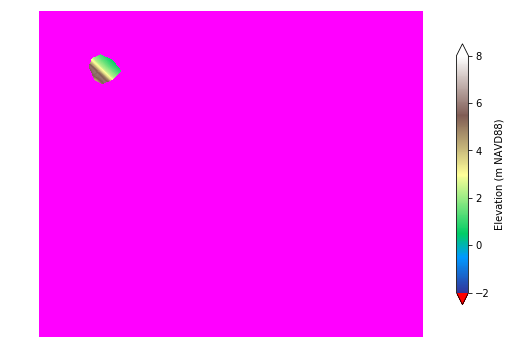

In [7]:
# Change palette to highlight missing values
import copy

# Change palette to highlight missing values
tcm = copy.copy(plt.cm.terrain) # work on a copy to prevent munting the original
tcm.norm_clip=False # need this to make next line work
tcm.set_bad(color='magenta',alpha=None)
tcm.set_under('red',alpha=None)

fig, ax = plt.subplots(figsize=(12,6))
plt.axis('off');
im=plt.imshow(out_image[0][:][:],cmap=tcm,vmin=-2,vmax=8)

cbar = fig.colorbar(im, extend='both', shrink=0.8, ax=ax)
cbar.set_label('Elevation (m NAVD88)')
for ticklabel in ax.xaxis.get_ticklabels():
    ticklabel.set_visible(False)